# BANK CUSTOMER CHURN PREDICTION USING MACHINE LEARNING 

# ~Importing the required libraries

In [1]:
import numpy as np
import pandas as pd  
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ~Read & import the dataset

In [2]:
df= pd.read_csv("Churn Modeling.csv")

# ~Display first & last 5 rows of data

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# ~Find shape & information of data

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# ~Check for null values in data

In [7]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# ~Get overall statistics about data

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# ~Drop irrelevant features of data

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ~To get customer churn count of data

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# ~To see the percentage of customers that are leaving

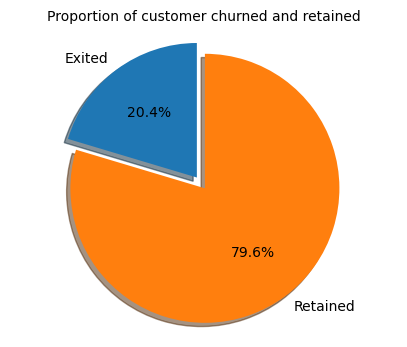

In [15]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0.1,0)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

# ~Visualize the count of customer churn of data

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

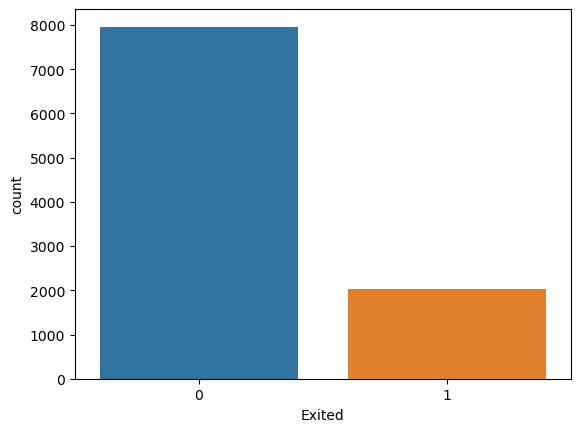

In [18]:
sns.countplot(df['Exited'])

# ~Visualize the churn count for both males and females

<AxesSubplot:xlabel='Gender', ylabel='count'>

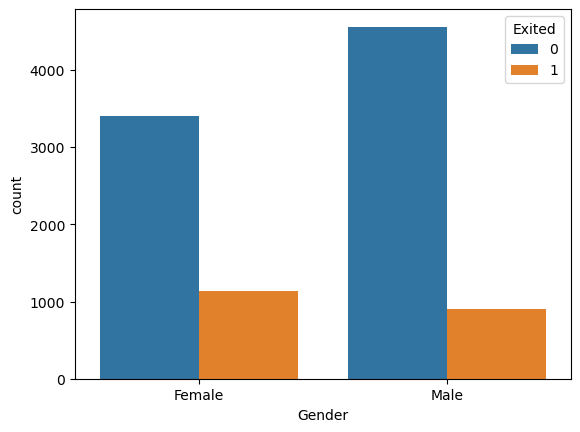

In [19]:
sns.countplot(x ='Gender', hue='Exited', data=df)

# ~Visualize the churn count for Geography of data

<AxesSubplot:xlabel='Geography', ylabel='count'>

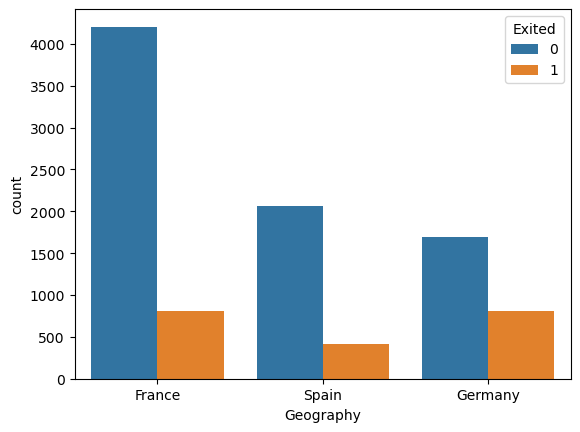

In [20]:
sns.countplot(x ='Geography', hue='Exited', data=df)

# ~Visualize the churn count for Credit Score of data

<AxesSubplot:xlabel='CreditScore', ylabel='count'>

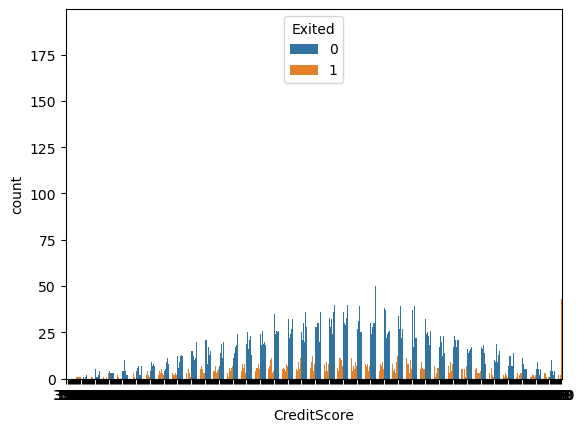

In [21]:
import pandas as pd 
df= pd.read_csv("Churn Modeling.csv")
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
import seaborn as sns
sns.countplot(x ='CreditScore', hue='Exited', data=df)

# ~Visualize the churn count for Age of data

<AxesSubplot:xlabel='Age', ylabel='count'>

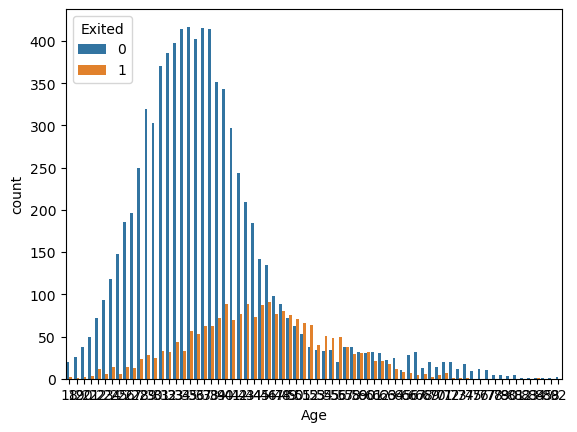

In [22]:
sns.countplot(x ='Age', hue='Exited', data=df)

# ~Visualize the churn count for Tenure of data

<AxesSubplot:xlabel='Tenure', ylabel='count'>

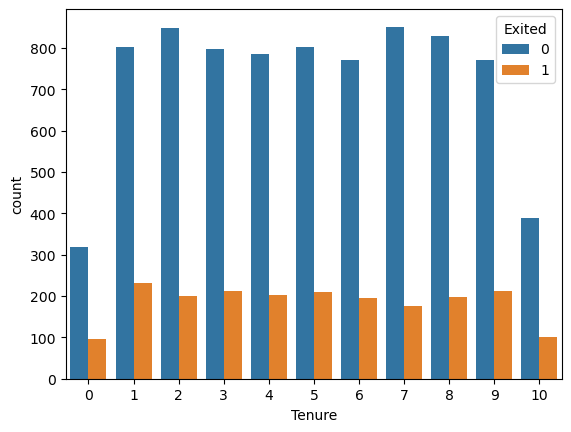

In [23]:
sns.countplot(x ='Tenure', hue='Exited', data=df)

# ~Detection of outlier of different variables of data using box plot

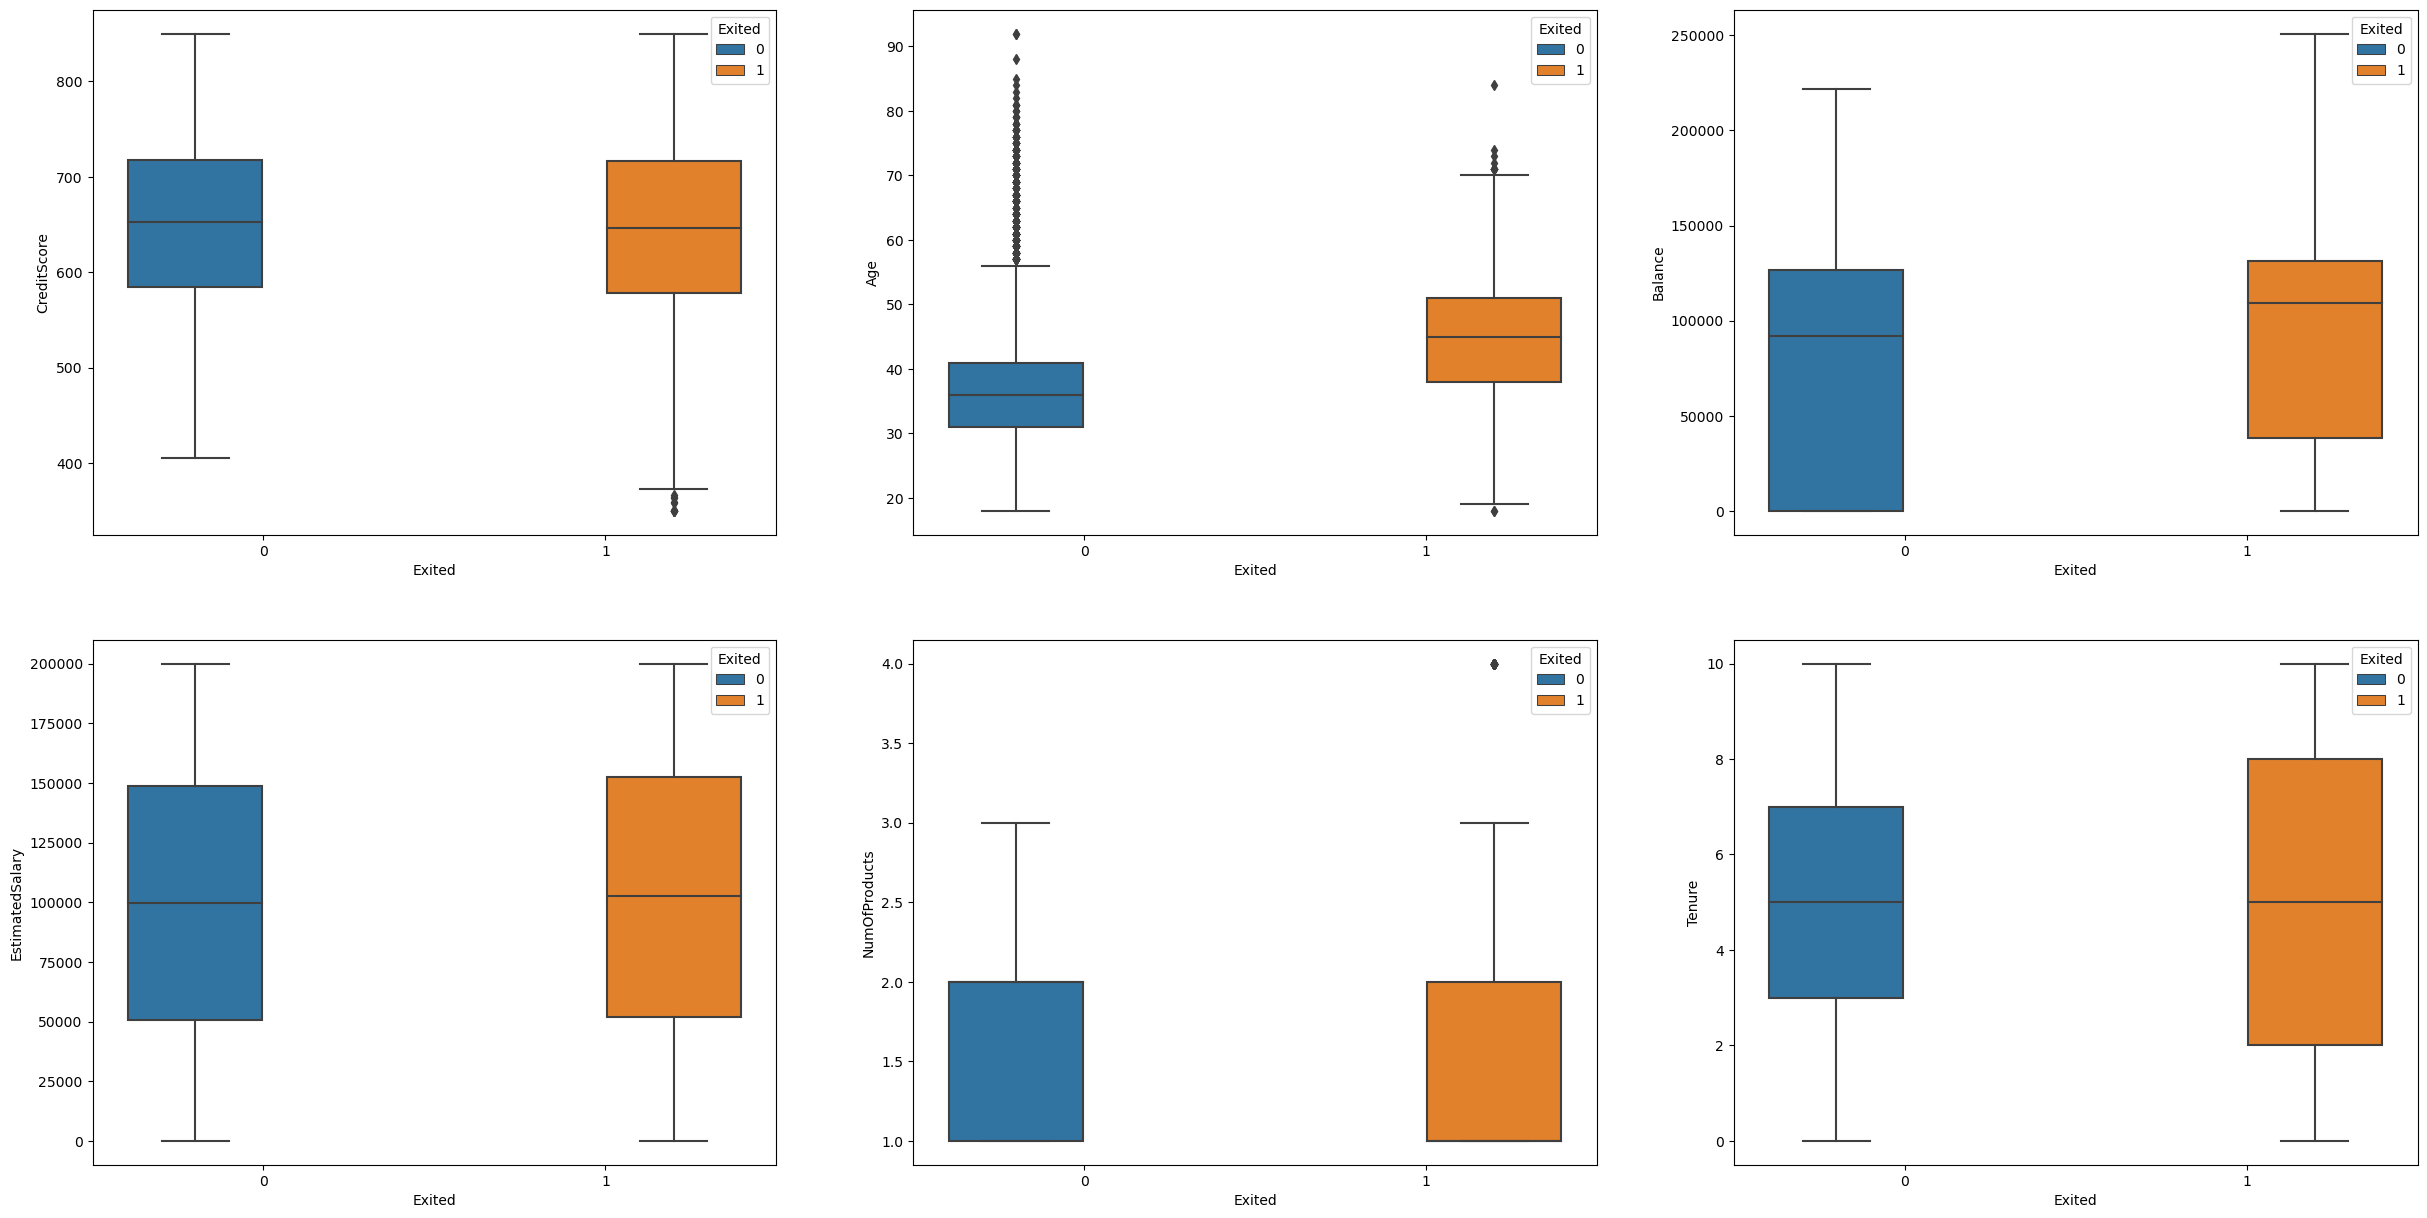

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

# ~Checking distribution of different variables of data

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

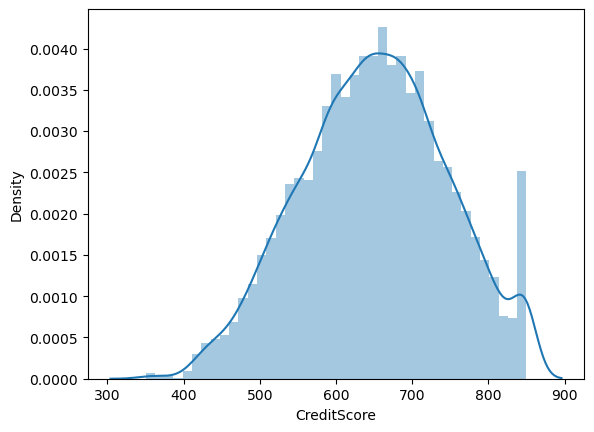

In [44]:
sns.distplot(df["CreditScore"])

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

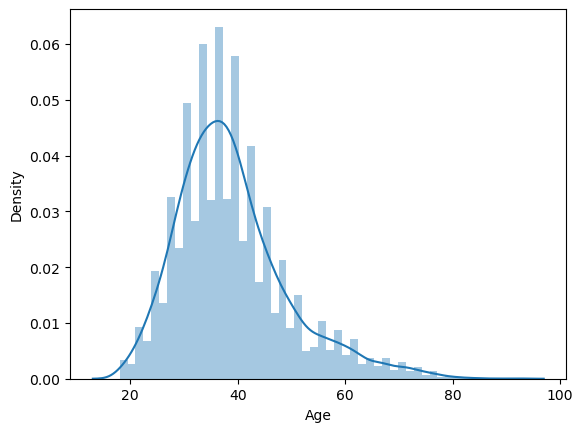

In [45]:
sns.distplot(df["Age"])

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

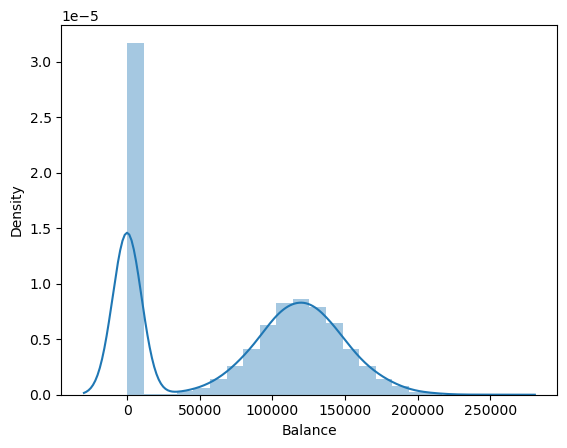

In [10]:
sns.distplot(df["Balance"])

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

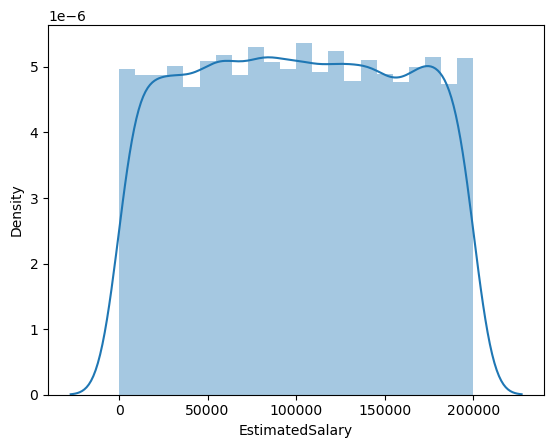

In [46]:
sns.distplot(df["EstimatedSalary"])

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumOfProducts', ylabel='Density'>

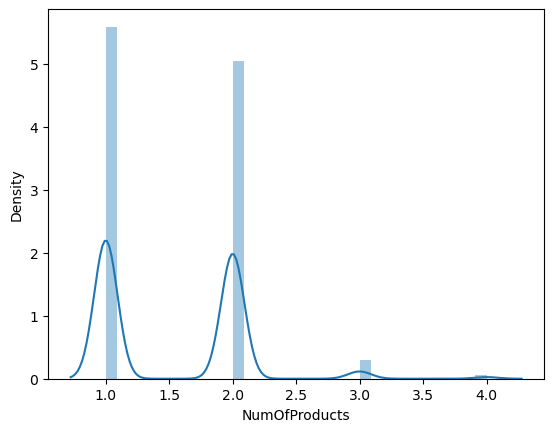

In [47]:
sns.distplot(df["NumOfProducts"])

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

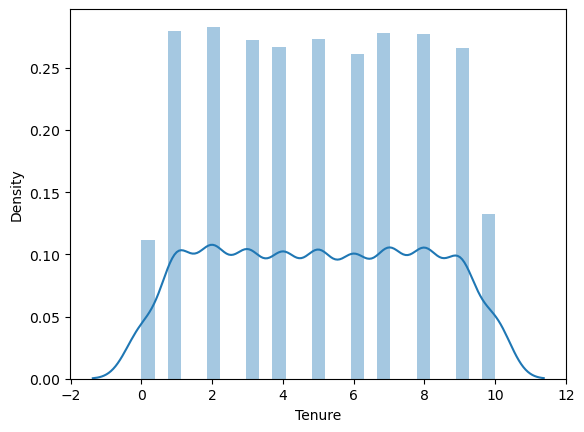

In [48]:
sns.distplot(df["Tenure"])

# ~Bivarite analysis of data

In [19]:
pd.crosstab(df["Gender"],df["Exited"])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


Text(0.5, 1.0, 'Effect of Gender on Exited ')

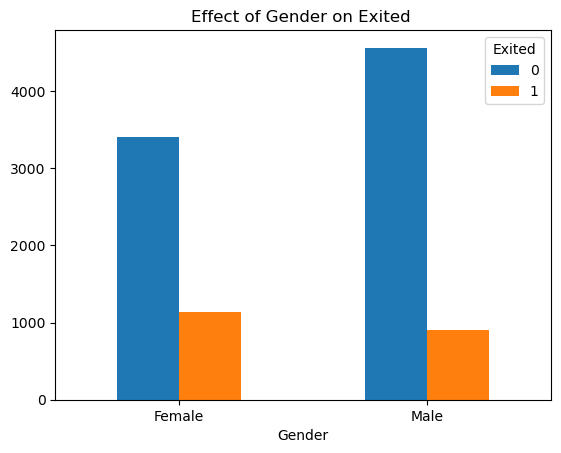

In [20]:
import matplotlib.pyplot as plt
cross_tab = pd.crosstab(df["Gender"],df["Exited"])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Gender on Exited ")

# ~Correlation values between numerical variables

<AxesSubplot:>

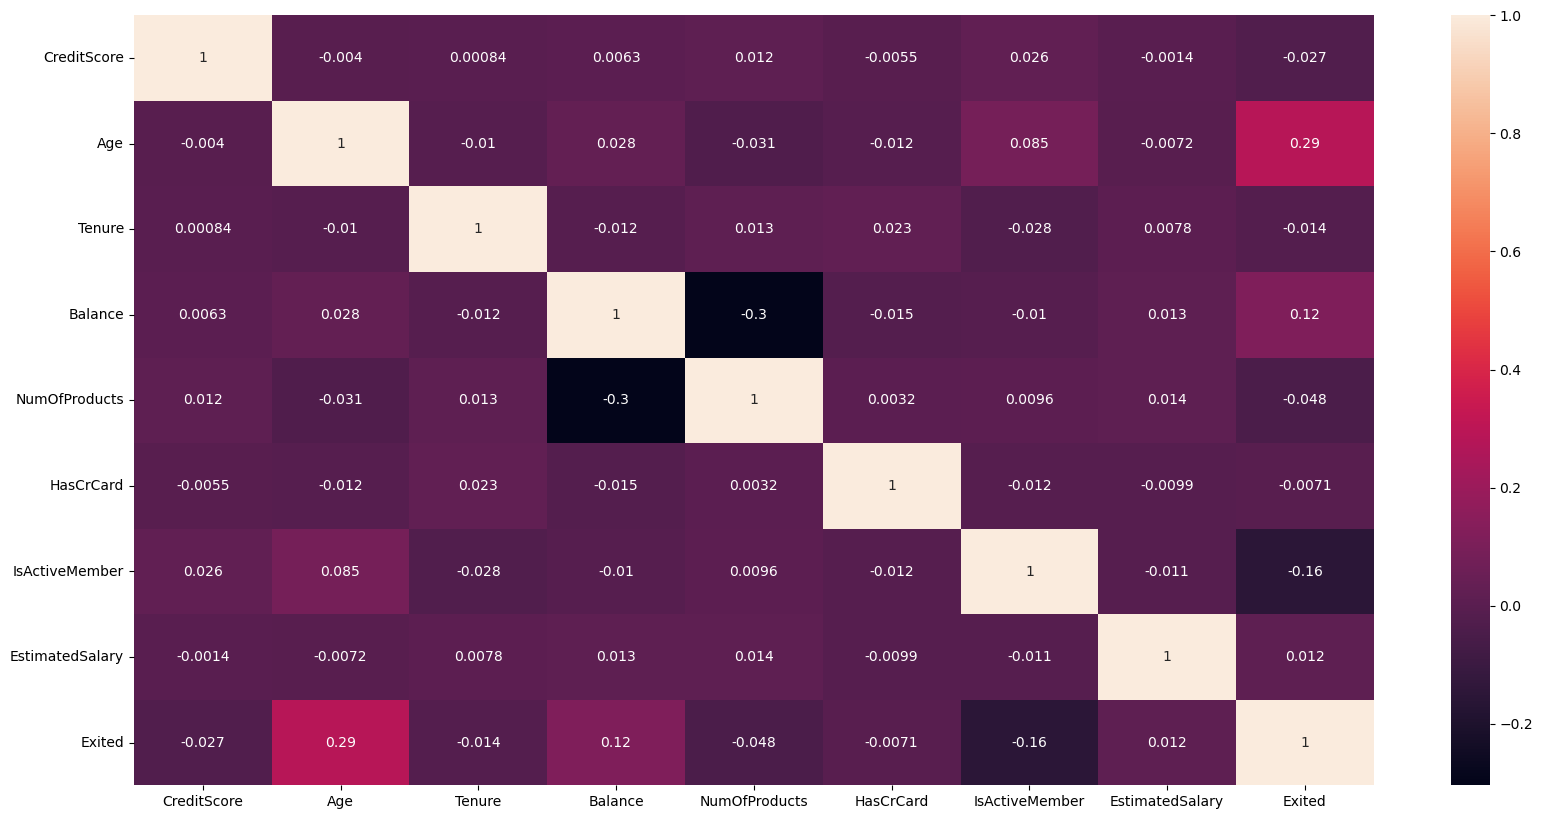

In [24]:
data  = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

# ~Encoding the categorial columns into numeric columns in data

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# ~Dealing with imbalance data

In [20]:
import pandas as pd
df= pd.read_csv("Churn Modeling.csv")
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])
A = df.drop('Exited',axis=1)

In [21]:
A

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [22]:
B = df['Exited']

In [23]:
B

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

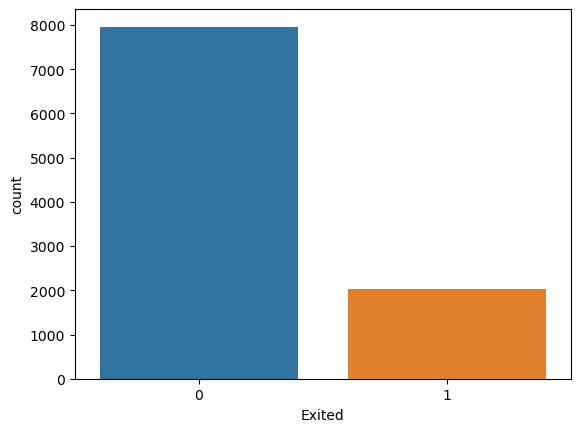

In [24]:
sns.countplot(df['Exited'])

# ~Splitting  data into training & testing imbalance data

In [25]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A , B , test_size=0.2)

In [26]:
len(A_train)

8000

# ~Standarisation of  imbalance data

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [35]:
A_train

array([[-0.25931864, -0.89343334, -0.84156567, ..., -1.29348411,
        -0.76148612, -1.2098375 ],
       [-1.97900179, -0.89343334, -0.84156567, ...,  0.77310575,
        -0.76148612,  0.4310398 ],
       [ 0.4416987 ,  0.43071054, -0.84156567, ..., -1.29348411,
        -0.76148612,  0.65733932],
       ...,
       [ 1.42750433,  1.75485442,  1.1882614 , ...,  0.77310575,
        -0.76148612, -1.20881283],
       [-0.76317485, -0.89343334, -0.84156567, ...,  0.77310575,
         1.31322157,  0.49878086],
       [ 1.05508887, -0.89343334, -0.84156567, ..., -1.29348411,
        -0.76148612, -1.49404832]])

# ~ Handling imbalance data with SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
A_res,B_res = SMOTE().fit_resample(A,B)

In [31]:
B_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

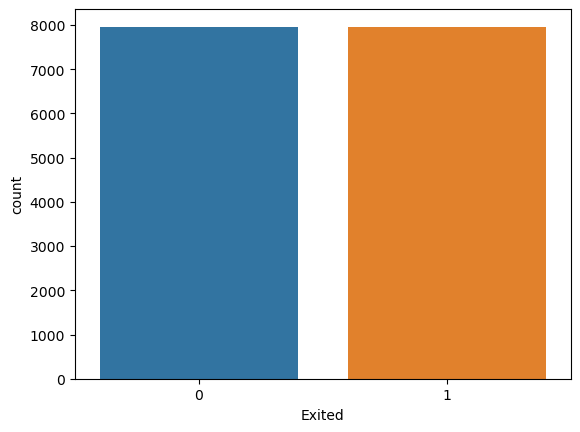

In [32]:
import seaborn as sns
sns.countplot(B_res)

# ~Splitting data into training & testing balanced data¶

In [33]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A_res , B_res , test_size=0.2)

# ~ Create & train the model using 5 classification algorithms

# 1)Logistic Regression classifier

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(A_train,B_train)

LogisticRegression()

In [39]:
B_pred1 = logmodel.predict(A_test)

In [40]:
B_pred1

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [41]:
#Accuracy score of balance data
from sklearn.metrics import accuracy_score
accuracy_score(B_test,B_pred1)

0.7777777777777778

In [42]:
#Precision score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(B_test,B_pred1)

0.7745952677459527

In [43]:
#Recall score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
recall_score(B_test,B_pred1)

0.7823899371069183

In [44]:
#f1 score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
f1_score(B_test,B_pred1)

0.7784730913642053

In [45]:
# Classification Report of balance data
from sklearn.metrics import classification_report
print(classification_report(B_test,B_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1596
           1       0.77      0.78      0.78      1590

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [46]:
# Confusion Matrix of balance data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(B_test,B_pred1))

[[1234  362]
 [ 346 1244]]


Text(0.5, 1.0, 'Accuracy score of Logitic Regression classifier: 0.7777777777777778')

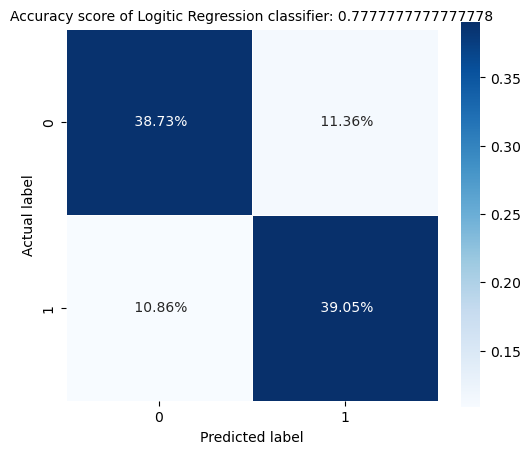

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test,B_pred1)
plt.figure(figsize=(6,5))
sns.heatmap(data=cm/np.sum(cm),fmt=' .2%',linewidths=0.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score of Logitic Regression classifier: {0}'.format(logmodel.score(A_test, B_test))
plt.title(all_sample_title, size = 10)

In [48]:
# ROC Curve for Logistic Regression classifier
r_probs = [0 for _ in range(len(B_test))]
logmodel_probs = logmodel.predict_proba(A_test)

In [49]:
logmodel_probs = logmodel_probs[:, 1]

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
r_auc = roc_auc_score(B_test, r_probs)
logmodel_auc = roc_auc_score(B_test, logmodel_probs)
print('Logistic Regression: AUROC = %.3f' % (logmodel_auc))

Logistic Regression: AUROC = 0.856


In [52]:
import matplotlib.pyplot as plt

In [53]:
r_fpr, r_tpr, _ = roc_curve(B_test, r_probs)
logmodel_fpr, logmodel_tpr, _ = roc_curve(B_test, logmodel_probs)

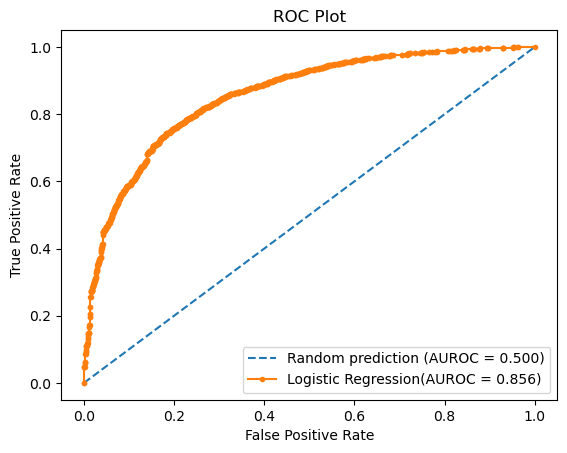

In [54]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logmodel_fpr, logmodel_tpr, marker='.', label='Logistic Regression(AUROC = %0.3f)' % logmodel_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# 2)KNeighbors classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier 

In [56]:
knn =  KNeighborsClassifier() 

In [57]:
knn.fit(A_train,B_train)

KNeighborsClassifier()

In [58]:
B_pred2 = knn.predict(A_test)

C:\Users\chira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
#Accuracy score of balance data
from sklearn.metrics import accuracy_score
accuracy_score(B_test,B_pred2)

0.8270558694287508

In [60]:
#Precision score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(B_test,B_pred2)

0.8169615619280048

In [61]:
#Recall score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
recall_score(B_test,B_pred2)

0.8421383647798742

In [62]:
#f1 score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
f1_score(B_test,B_pred2)

0.8293589346546918

In [63]:
# Classification Report of balance data
from sklearn.metrics import classification_report
print(classification_report(B_test,B_pred2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1596
           1       0.82      0.84      0.83      1590

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [64]:
# Confusion Matrix of balance data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(B_test,B_pred2))

[[1296  300]
 [ 251 1339]]


C:\Users\chira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'Accuracy score of KNearest Neighbors classifier: 0.8270558694287508')

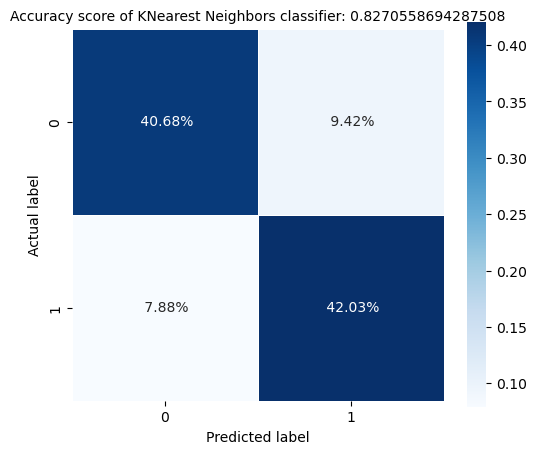

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test,B_pred2)
plt.figure(figsize=(6,5))
sns.heatmap(data=cm/np.sum(cm),fmt=' .2%',linewidths=0.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score of KNearest Neighbors classifier: {0}'.format(knn.score(A_test, B_test))
plt.title(all_sample_title, size = 10)

In [66]:
# ROC Curve for KNeighbors classifier
r_probs = [0 for _ in range(len(B_test))]
knn_probs = knn.predict_proba(A_test)

In [67]:
knn_probs = knn_probs[:, 1]

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
r_auc = roc_auc_score(B_test, r_probs)
knn_auc = roc_auc_score(B_test, knn_probs)
print('KNeighbors: AUROC = %.3f' % (knn_auc))

KNeighbors: AUROC = 0.894


In [70]:
import matplotlib.pyplot as plt

In [71]:
r_fpr, r_tpr, _ = roc_curve(B_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(B_test, knn_probs)

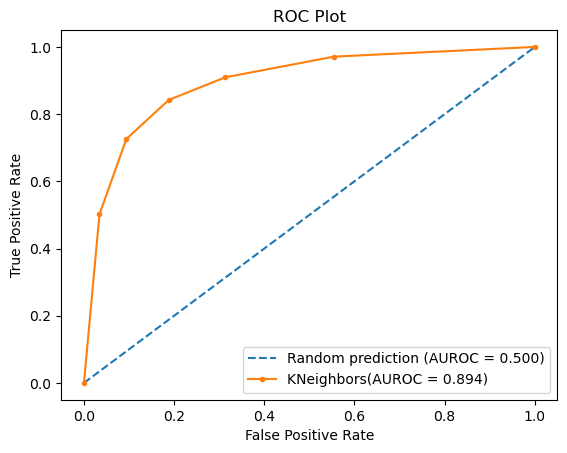

In [72]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors(AUROC = %0.3f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# 3)Decision Tree classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier 

In [74]:
dt = DecisionTreeClassifier()

In [75]:
dt.fit(A_train,B_train)

DecisionTreeClassifier()

In [76]:
B_pred3 = dt.predict(A_test)

In [77]:
#Accuracy score of balance data
from sklearn.metrics import accuracy_score
accuracy_score(B_test,B_pred3)

0.802887633396108

In [78]:
#Precision score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(B_test,B_pred3)

0.7950920245398773

In [79]:
#Recall score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
recall_score(B_test,B_pred3)

0.8150943396226416

In [80]:
#f1 score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
f1_score(B_test,B_pred3)

0.8049689440993788

In [81]:
# Classification Report of balance data
from sklearn.metrics import classification_report
print(classification_report(B_test,B_pred3))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1596
           1       0.80      0.82      0.80      1590

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [82]:
# Confusion Matrix of balance data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(B_test,B_pred3))

[[1262  334]
 [ 294 1296]]


Text(0.5, 1.0, 'Accuracy score of Decision Tree classifier: 0.802887633396108')

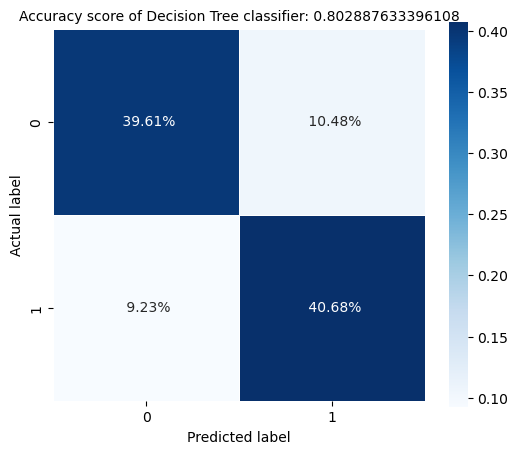

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test,B_pred3)
plt.figure(figsize=(6,5))
sns.heatmap(data=cm/np.sum(cm),fmt=' .2%',linewidths=0.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score of Decision Tree classifier: {0}'.format(dt.score(A_test, B_test))
plt.title(all_sample_title, size = 10)

In [84]:
# ROC Curve for Decision Tree classifier
r_probs = [0 for _ in range(len(B_test))]
dt_probs = dt.predict_proba(A_test)

In [85]:
dt_probs = dt_probs[:, 1]

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
r_auc = roc_auc_score(B_test, r_probs)
dt_auc = roc_auc_score(B_test, dt_probs)
print('Decision Tree: AUROC = %.3f' % (dt_auc))

Decision Tree: AUROC = 0.803


In [88]:
import matplotlib.pyplot as plt

In [89]:
r_fpr, r_tpr, _ = roc_curve(B_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(B_test, dt_probs)

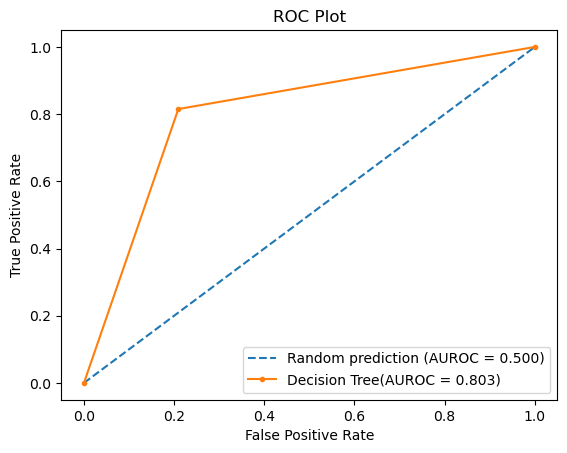

In [90]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree(AUROC = %0.3f)' % dt_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# 4)Random Forest classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier 

In [92]:
rf = RandomForestClassifier()

In [93]:
rf.fit(A_train,B_train)

RandomForestClassifier()

In [94]:
B_pred4 = rf.predict(A_test)

In [95]:
#Accuracy score of balance data
from sklearn.metrics import accuracy_score
accuracy_score(B_test,B_pred4)

0.8587570621468926

In [96]:
#Precision score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(B_test,B_pred4)

0.8621346886912326

In [97]:
#Recall score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
recall_score(B_test,B_pred4)

0.8534591194968554

In [98]:
#f1 score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
f1_score(B_test,B_pred4)

0.8577749683944375

In [99]:
# Classification Report of balance data
from sklearn.metrics import classification_report
print(classification_report(B_test,B_pred4))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1596
           1       0.86      0.85      0.86      1590

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [100]:
# Confusion Matrix of balance data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(B_test,B_pred4))

[[1379  217]
 [ 233 1357]]


Text(0.5, 1.0, 'Accuracy score of Random Forest classifier: 0.8587570621468926')

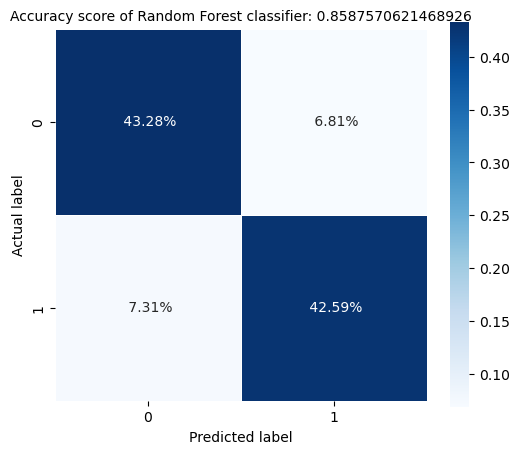

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test,B_pred4)
plt.figure(figsize=(6,5))
sns.heatmap(data=cm/np.sum(cm),fmt=' .2%',linewidths=0.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score of Random Forest classifier: {0}'.format(rf.score(A_test, B_test))
plt.title(all_sample_title, size = 10)

In [102]:
# ROC Curve for Random Forest classifier
r_probs = [0 for _ in range(len(B_test))]
rf_probs = rf.predict_proba(A_test)

In [103]:
rf_probs = rf_probs[:, 1]

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

In [105]:
r_auc = roc_auc_score(B_test, r_probs)
rf_auc = roc_auc_score(B_test, rf_probs)
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random Forest: AUROC = 0.932


In [106]:
import matplotlib.pyplot as plt

In [107]:
r_fpr, r_tpr, _ = roc_curve(B_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(B_test, rf_probs)

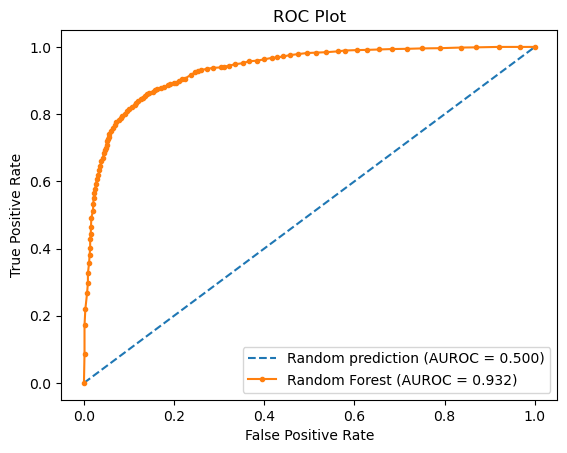

In [108]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# 5)Gradient Boosting classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gbc =  GradientBoostingClassifier()

In [111]:
gbc.fit(A_train,B_train)

GradientBoostingClassifier()

In [112]:
B_pred5 = gbc.predict(A_test)

In [113]:
#Accuracy score of balance data
from sklearn.metrics import accuracy_score
accuracy_score(B_test,B_pred5)

0.8418079096045198

In [114]:
#Precision score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(B_test,B_pred5)

0.8489717223650386

In [115]:
#Recall score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
recall_score(B_test,B_pred5)

0.8308176100628931

In [116]:
#f1 score of balance data
from sklearn.metrics import precision_score,recall_score,f1_score
f1_score(B_test,B_pred5)

0.8397965670692943

In [117]:
# Classification Report of balance data
from sklearn.metrics import classification_report
print(classification_report(B_test,B_pred5))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1596
           1       0.85      0.83      0.84      1590

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [118]:
# Confusion Matrix of balance data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(B_test,B_pred5))

[[1361  235]
 [ 269 1321]]


Text(0.5, 1.0, 'Accuracy score of Gradient Boosting classifier: 0.8418079096045198')

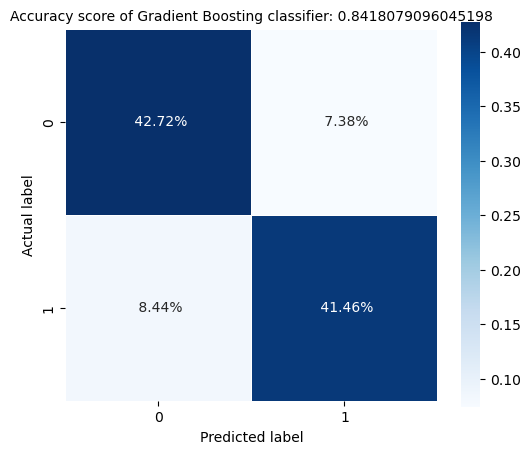

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test,B_pred5)
plt.figure(figsize=(6,5))
sns.heatmap(data=cm/np.sum(cm),fmt=' .2%',linewidths=0.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score of Gradient Boosting classifier: {0}'.format(gbc.score(A_test, B_test))
plt.title(all_sample_title, size = 10)

In [120]:
# ROC Curve for Gradient Boosting classifier
r_probs = [0 for _ in range(len(B_test))]
gbc_probs = gbc.predict_proba(A_test)

In [121]:
gbc_probs = gbc_probs[:, 1]

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

In [123]:
r_auc = roc_auc_score(B_test, r_probs)
gbc_auc = roc_auc_score(B_test, gbc_probs)
print('Gradient Boosting: AUROC = %.3f' % (gbc_auc))

Gradient Boosting: AUROC = 0.922


In [124]:
import matplotlib.pyplot as plt

In [125]:
r_fpr, r_tpr, _ = roc_curve(B_test, r_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(B_test, gbc_probs)

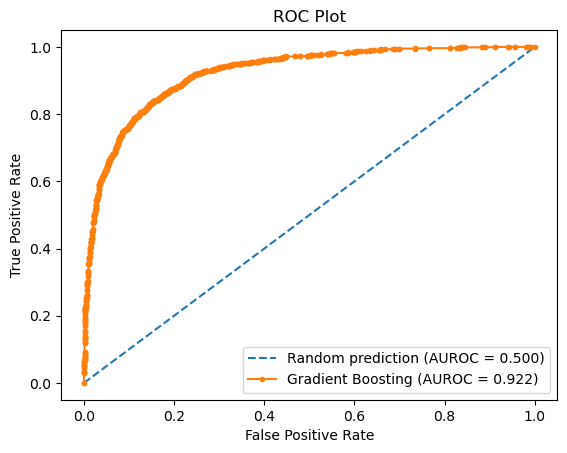

In [126]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gbc_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

# ~Visualise the final data

In [127]:
final_data = pd.DataFrame({'Models': ['LR','KNN','DT','RF','GBC'],
                          'ACC': [accuracy_score(B_test,B_pred1),
                                 accuracy_score(B_test,B_pred2),
                                 accuracy_score(B_test,B_pred3),
                                 accuracy_score(B_test,B_pred4),
                                 accuracy_score(B_test,B_pred5)]})

In [128]:
final_data

,Models,ACC
0,LR,0.777778
1,KNN,0.827056
2,DT,0.802888
3,RF,0.858757
4,GBC,0.841808


C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

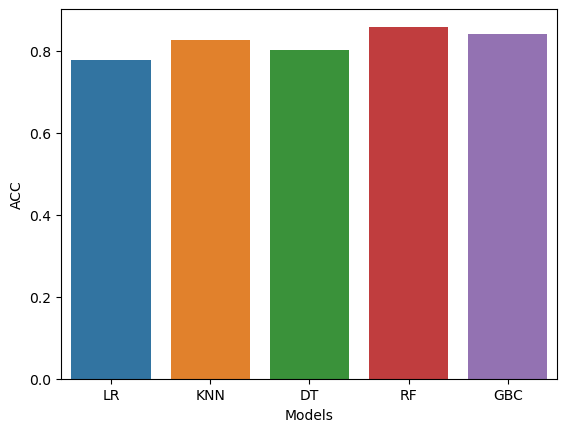

In [129]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])

# ~Save the best model for dataset

In [130]:
A_res = sc.fit_transform(A_res)

In [131]:
#Train the best model for dataset 
rf.fit(A_res,B_res)

RandomForestClassifier()

In [132]:
#save RF model for dataset
import joblib

In [133]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [134]:
model = joblib.load('churn_predict_model')

In [135]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [136]:
#Model predicts the customer churn on giving any random input
result=model.predict([[502,0,0,42,8,159660.80,3,1,0,113931.57]])
print(result
     )

[1]


#  GUI

In [1]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=float(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
   
    model = joblib.load('churn_predict_model')
    print(p1)
    print(p2)
    print(p3)
    print(p4)
    print(p5)
    print(p6)
    print(p7)
    print(p8)
    print(p9)
    print(p10)
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]])
    print(result) 
    if result == 0:
           Label(master, text="No Exit").grid(row=31)
    else:
            Label(master, text="Exit").grid(row=31)
                
           
               
            
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")
label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Geography").grid(row=2)
Label(master, text="Gender").grid(row=3)
Label(master, text="Age").grid(row=4)
Label(master, text="Tenure").grid(row=5)
Label(master, text="Balance").grid(row=6)
Label(master, text="NumOfProducts").grid(row=7)
Label(master, text="HasCrCard").grid(row=8)
Label(master, text="IsActiveMember").grid(row=9)
Label(master, text="EstimatedSalary").grid(row=10)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
        
    

502
0
0
42
8
15637.0
3
1
0
256287.0
[1]
